# Poisonous Mushrooms or Not Poisonous Mushrooms

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow 
import os
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from tensorflow.python import keras
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import tensorflow as tf

# IMPORT DATASETS

In [181]:
train_path = '/Users/sophie/Desktop/Mushroom_Data2/Training'
valid_path = '/Users/sophie/Desktop/Mushroom_Data2/Validation'
test_path = '/Users/sophie/Desktop/Mushroom_Data2/Test'

image_gen = ImageDataGenerator() # create a data generator rescale= 1. /255

train_batches = image_gen.flow_from_directory(
    train_path,
    classes=['poisonous', 'non_poisonous'],
    target_size=(224, 224),
    batch_size=50
)
validation_batches = image_gen.flow_from_directory(
    valid_path,
    classes=['poisonous', 'non_poisonous'],
    target_size=(224, 224),
    batch_size=20
)

test_batches = image_gen.flow_from_directory(
    test_path,
    classes=['poisonous', 'non_poisonous'],
    target_size=(224, 224),
    batch_size=20
)

Found 2700 images belonging to 2 classes.
Found 580 images belonging to 2 classes.
Found 580 images belonging to 2 classes.


# DATA VISUALIZATION

In [182]:
# plots images with labels within Jupyter Notebook
def plots(ims, figsize=(40,20), rows=5, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] !=3):
            ims = ims.transpose((0, 2, 3, 1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None: 
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

# will reference 

In [183]:
ims, labels = next(train_batches)

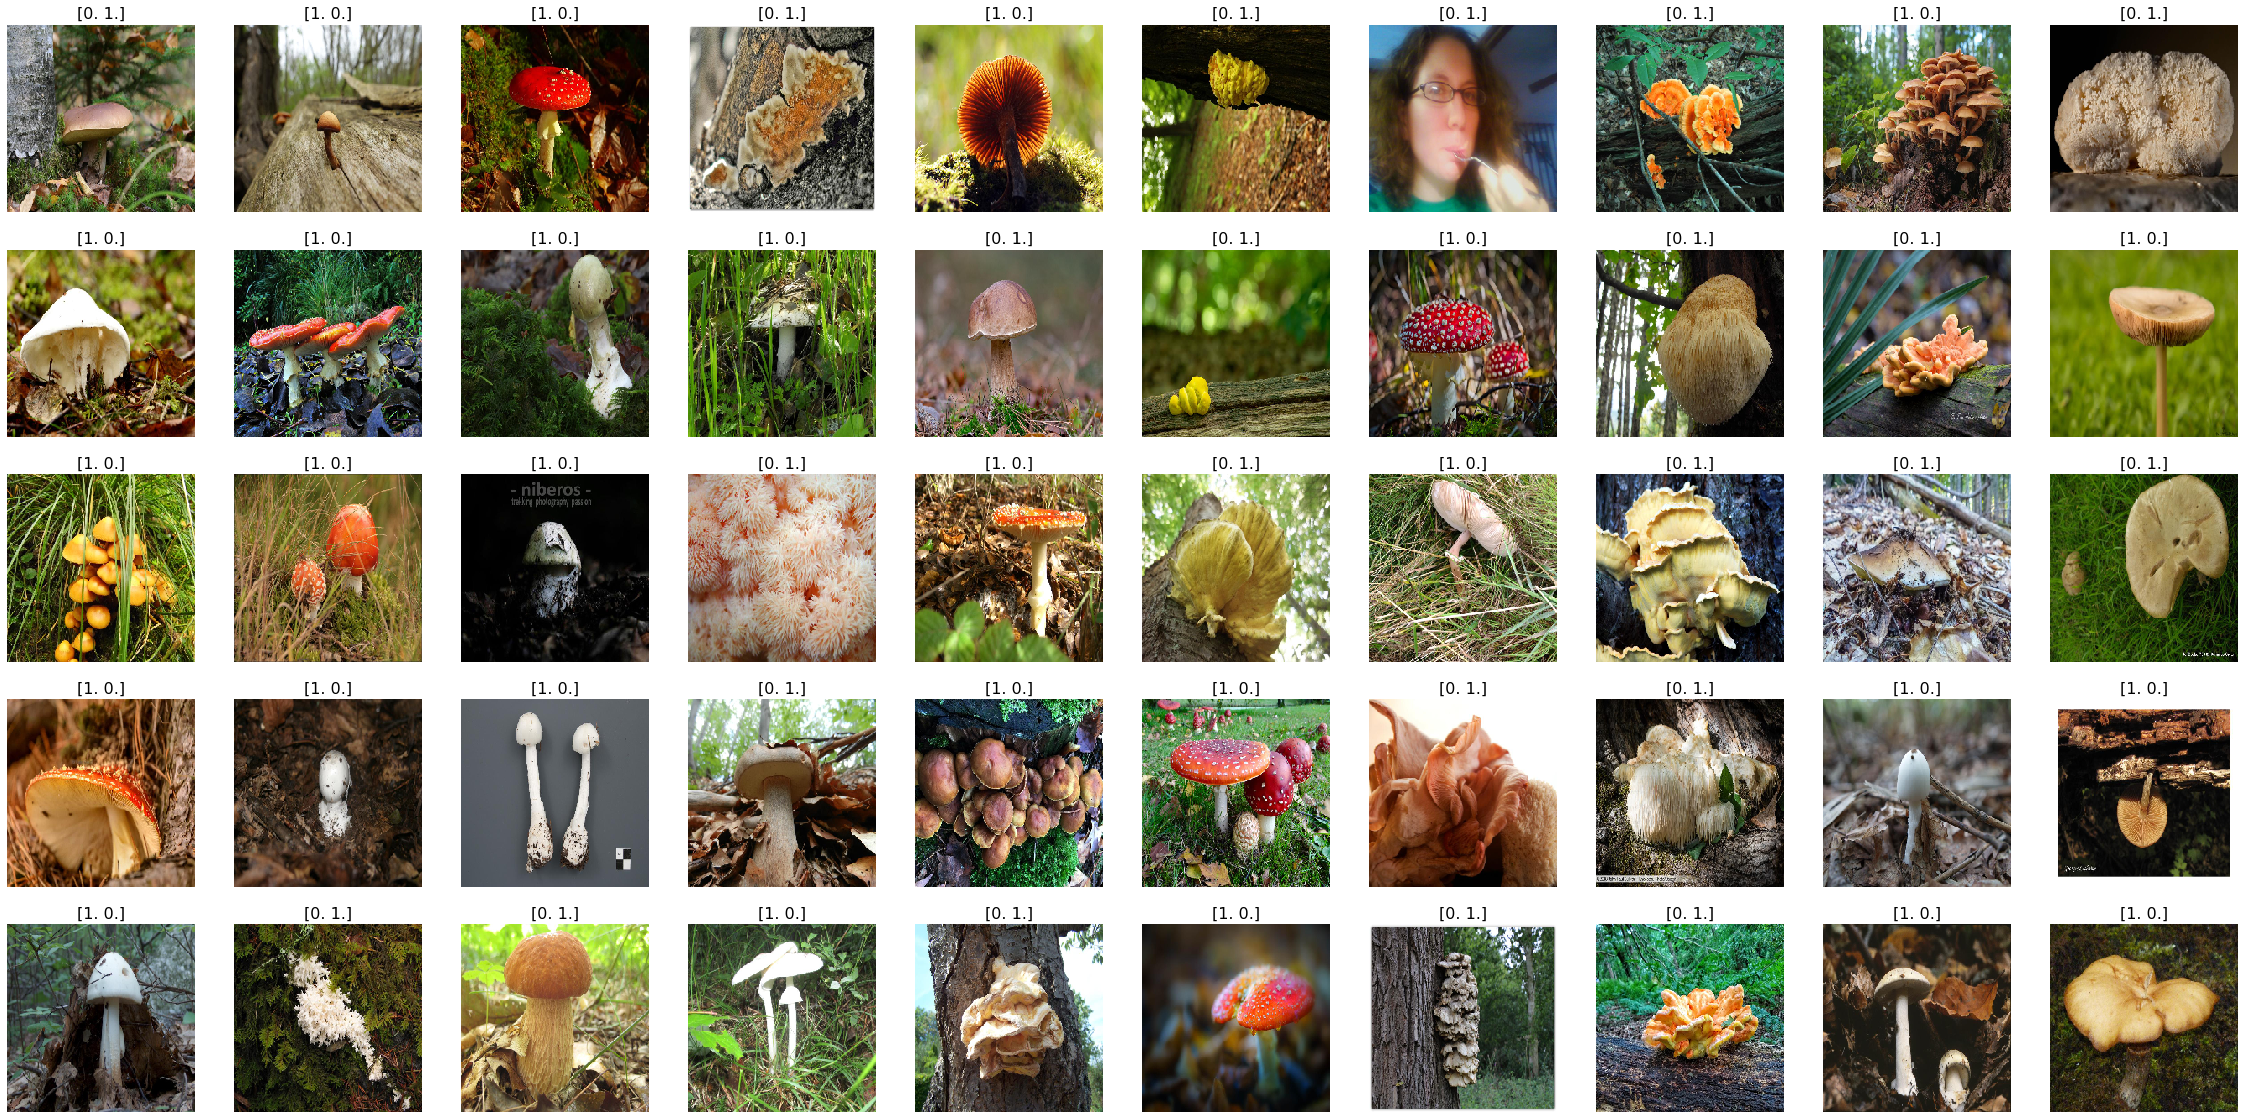

In [184]:
plots(ims, titles=labels)

# CNN MODEL TRAINING

In [185]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [186]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
cnn_model.add(AveragePooling2D())
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
cnn_model.add(AveragePooling2D())
cnn_model.add(Dropout(0.3))

cnn_model.add(Flatten())

cnn_model.add(Dense(units=128, activation='relu'))

cnn_model.add(Dense(units=64, activation='relu'))

cnn_model.add(Dense(units=2, activation = 'softmax'))

cnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
average_pooling2d_13 (Averag (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 109, 109, 16)      4624      
_________________________________________________________________
average_pooling2d_14 (Averag (None, 54, 54, 16)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 54, 54, 16)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 46656)            

In [187]:
cnn_model.compile(loss ='binary_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [188]:
history = cnn_model.fit_generator(train_batches,
                        steps_per_epoch=135,
                        validation_data = validation_batches,
                        validation_steps=29,
                        epochs=1,
                        verbose=1)

Epoch 1/1
135/135 [==============================] - 243s 2s/step - loss: 7.0662 - accuracy: 0.5394 - val_loss: 6.1348 - val_accuracy: 0.5362


# CNN MODEL EVALUATION

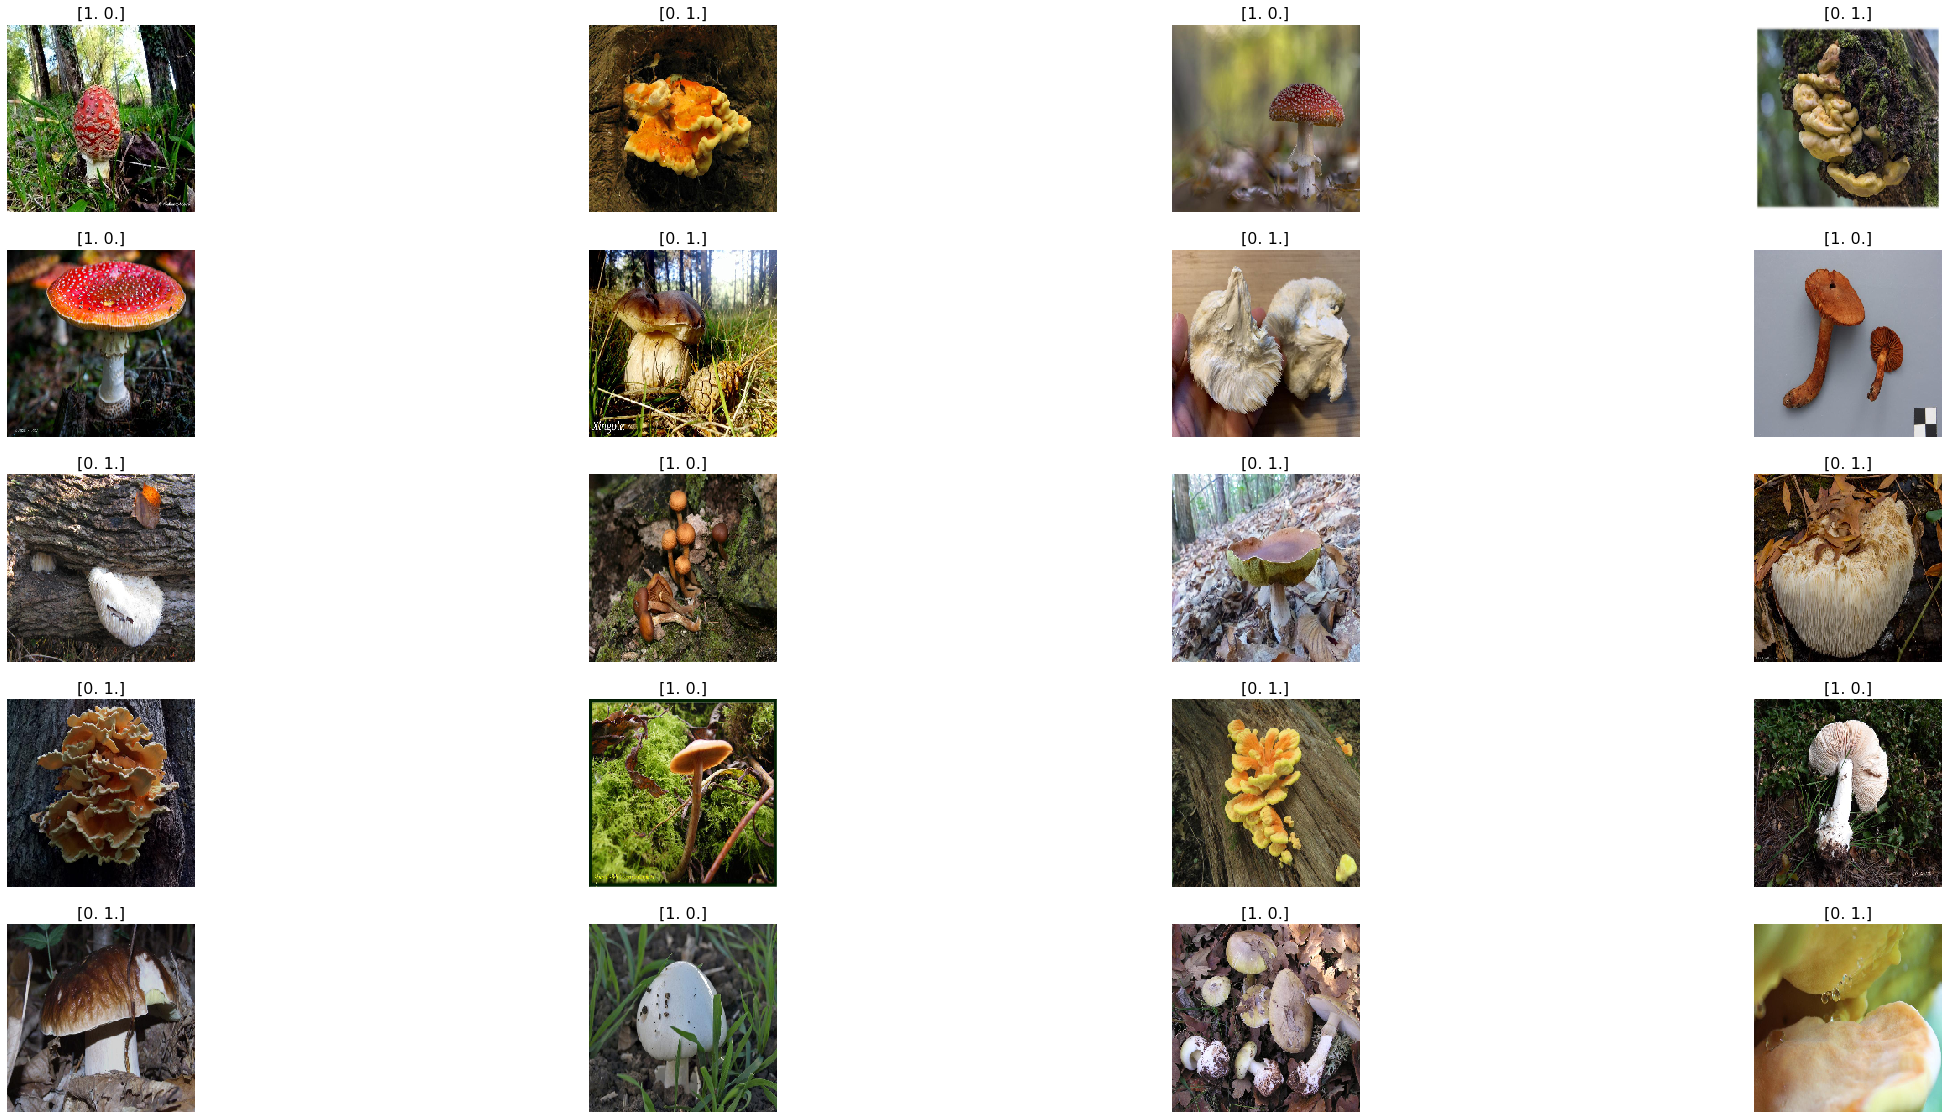

In [257]:
X_test, y_test = next(test_batches)
plots(X_test, titles=y_test)

In [258]:
score = cnn_model.evaluate(X_test, y_test,verbose=0)

In [259]:
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.4500


In [260]:
# instead of having the labels as 0, 1, it is just going to grab the first label poisonous or not 


In [261]:
y_predict= cnn_model.predict(test_batches, steps=1, verbose=0)
y_predict

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [262]:
results2 = confusion_matrix(y_test[:,0], y_predict[:,0])
print(results2)

[[ 0 11]
 [ 0  9]]


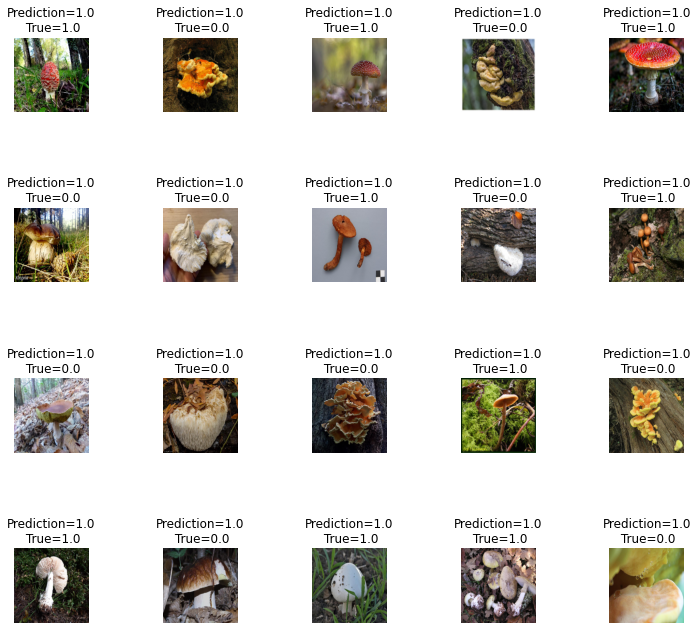

In [292]:
L = 4
W = 5
fig, axes = plt.subplots(L, W, figsize=(12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].astype('uint8'))
    axes[i].set_title("Prediction={}\n True={}".format(y_predict[:,0][i], y_test[:,0][i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)
# will reference 

# CNN EVALUATION VISUALIZATION

In [201]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

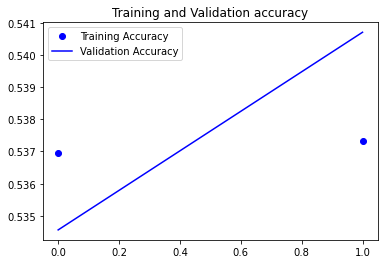

In [71]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

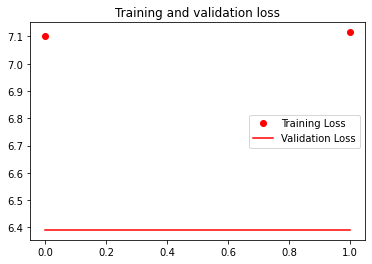

In [72]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()